 ## Aviation Accident Database & Synopses

# A. Defining the Question 

 1. Specifying the question

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

  2. Defining the Metric for success

This analysis will be considered a success when we are able to effectively determine  the aircraft with the lowest risk for the Company to purchase and start this new business.  

  3. Data Analysis

This analysis will be considered a success when we are able to effectively determine  the aircraft with the lowest risk for the Company to purchase and start this new business.  

Importing the Libraries

In [2]:
 #importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 3. Understand the Business Problem
  
Your company wants to venture into aviation but needs help identifying low-risk aircraft. Your job is to explore accident data, identify patterns, and recommend which aircraft types are safest.

## Data reading

In [38]:
# Run this cell without changes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [40]:
# Loading the Dataset
aviation= pd.read_excel ('AviationData.xlsx')


In [41]:
import os
print(os.getcwd())

c:\Users\PC\Documents\First\Assignment\project01


# 3. Checking the Data

In [42]:

print(aviation.head(5))

         Event.Id Investigation.Type Accident.Number Event.Date  \
0  20001218X45444           Accident      SEA87LA080 1948-10-24   
1  20001218X45447           Accident      LAX94LA336 1962-07-19   
2  20061025X01555           Accident      NYC07LA005 1974-08-30   
3  20001218X45448           Accident      LAX96LA321 1977-06-19   
4  20041105X01764           Accident      CHI79FA064 1979-08-02   

          Location        Country   Latitude  Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States        NaN        NaN          NaN   
1   BRIDGEPORT, CA  United States        NaN        NaN          NaN   
2    Saltville, VA  United States  36.922223 -81.878056          NaN   
3       EUREKA, CA  United States        NaN        NaN          NaN   
4       Canton, OH  United States        NaN        NaN          NaN   

  Airport.Name  ... Total.Minor.Injuries Total.Uninjured Weather.Condition  \
0          NaN  ...                  0.0             0.0               UNK   
1       

In [6]:
aviation.shape

(88889, 35)

In [7]:
aviation.describe

<bound method NDFrame.describe of              Event.Id Investigation.Type Accident.Number Event.Date  \
0      20001218X45444           Accident      SEA87LA080 1948-10-24   
1      20001218X45447           Accident      LAX94LA336 1962-07-19   
2      20061025X01555           Accident      NYC07LA005 1974-08-30   
3      20001218X45448           Accident      LAX96LA321 1977-06-19   
4      20041105X01764           Accident      CHI79FA064 1979-08-02   
...               ...                ...             ...        ...   
88884  20221227106491           Accident      ERA23LA093 2022-12-26   
88885  20221227106494           Accident      ERA23LA095 2022-12-26   
88886  20221227106497           Accident      WPR23LA075 2022-12-26   
88887  20221227106498           Accident      WPR23LA076 2022-12-26   
88888  20221230106513           Accident      ERA23LA097 2022-12-29   

              Location        Country   Latitude  Longitude Airport.Code  \
0      MOOSE CREEK, ID  United States

In [8]:
aviation.info


<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number Event.Date  \
0      20001218X45444           Accident      SEA87LA080 1948-10-24   
1      20001218X45447           Accident      LAX94LA336 1962-07-19   
2      20061025X01555           Accident      NYC07LA005 1974-08-30   
3      20001218X45448           Accident      LAX96LA321 1977-06-19   
4      20041105X01764           Accident      CHI79FA064 1979-08-02   
...               ...                ...             ...        ...   
88884  20221227106491           Accident      ERA23LA093 2022-12-26   
88885  20221227106494           Accident      ERA23LA095 2022-12-26   
88886  20221227106497           Accident      WPR23LA075 2022-12-26   
88887  20221227106498           Accident      WPR23LA076 2022-12-26   
88888  20221230106513           Accident      ERA23LA097 2022-12-29   

              Location        Country   Latitude  Longitude Airport.Code  \
0      MOOSE CREEK, ID  United States  

# 5. Tidying the Dataset

In [13]:
#Checking unique values

aviation.isnull

<bound method DataFrame.isnull of              Event.Id Investigation.Type Accident.Number Event.Date  \
0      20001218X45444           Accident      SEA87LA080 1948-10-24   
1      20001218X45447           Accident      LAX94LA336 1962-07-19   
2      20061025X01555           Accident      NYC07LA005 1974-08-30   
3      20001218X45448           Accident      LAX96LA321 1977-06-19   
4      20041105X01764           Accident      CHI79FA064 1979-08-02   
...               ...                ...             ...        ...   
88884  20221227106491           Accident      ERA23LA093 2022-12-26   
88885  20221227106494           Accident      ERA23LA095 2022-12-26   
88886  20221227106497           Accident      WPR23LA075 2022-12-26   
88887  20221227106498           Accident      WPR23LA076 2022-12-26   
88888  20221230106513           Accident      ERA23LA097 2022-12-29   

              Location        Country   Latitude  Longitude Airport.Code  \
0      MOOSE CREEK, ID  United States

In [14]:
# Identifying the Missing Data
aviation.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
Location

In [19]:
#checking for duplicates in Results dataset
aviation.duplicated().sum()

0

The missing data will not affect your Data Analysis

In [22]:
#creating new dataset with relevant columns

aviation_final= aviation[['Event.Id','Investigation.Type','Accident.Number','Event.Date','Country','Injury.Severity','Aircraft.damage','Aircraft.Category','Registration.Number','Make','Number.of.Engines','Engine.Type','Purpose.of.flight','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Weather.Condition','Location.1','US_State']]
aviation_final


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Location.1,US_State
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,Fatal(2),Destroyed,NaN,NC6404,Stinson,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,MOOSE CREEK,Idaho
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,NaN,N5069P,Piper,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,BRIDGEPORT,California
2,20061025X01555,Accident,NYC07LA005,1974-08-30,United States,Fatal(3),Destroyed,NaN,N5142R,Cessna,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Saltville,Virginia
3,20001218X45448,Accident,LAX96LA321,1977-06-19,United States,Fatal(2),Destroyed,NaN,N1168J,Rockwell,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,EUREKA,California
4,20041105X01764,Accident,CHI79FA064,1979-08-02,United States,Fatal(1),Destroyed,NaN,N15NY,Cessna,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Canton,Ohio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,United States,Minor,NaN,NaN,N1867H,PIPER,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,Annapolis,NaN
88885,20221227106494,Accident,ERA23LA095,2022-12-26,United States,NaN,NaN,NaN,N2895Z,BELLANCA,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,Hampton,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,United States,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,Payson,NaN
88887,20221227106498,Accident,WPR23LA076,2022-12-26,United States,NaN,NaN,NaN,N210CU,CESSNA,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,Morgan,NaN


In [23]:

#Standardizing the table column names
aviation_final.columns = aviation_final.columns.str.strip().str.upper().str.replace('.', '_')
aviation_final.columns
aviation_final.head(3)

,EVENT_ID,INVESTIGATION_TYPE,ACCIDENT_NUMBER,EVENT_DATE,COUNTRY,INJURY_SEVERITY,AIRCRAFT_DAMAGE,AIRCRAFT_CATEGORY,REGISTRATION_NUMBER,MAKE,NUMBER_OF_ENGINES,ENGINE_TYPE,PURPOSE_OF_FLIGHT,TOTAL_FATAL_INJURIES,TOTAL_SERIOUS_INJURIES,TOTAL_MINOR_INJURIES,TOTAL_UNINJURED,WEATHER_CONDITION,LOCATION_1,US_STATE
0,20001218X45444,Accident,SEA87LA080,1948-10-24,United States,Fatal(2),Destroyed,NaN,NC6404,Stinson,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,MOOSE CREEK,Idaho
1,20001218X45447,Accident,LAX94LA336,1962-07-19,United States,Fatal(4),Destroyed,NaN,N5069P,Piper,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,BRIDGEPORT,California
2,20061025X01555,Accident,NYC07LA005,1974-08-30,United States,Fatal(3),Destroyed,NaN,N5142R,Cessna,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Saltville,Virginia


## Data Analysis

In [44]:
aviation_final['EVENT_DATE'] = pd.to_datetime(aviation_final['EVENT_DATE'])


C:\Users\PC\AppData\Local\Temp\ipykernel_6376\3943396867.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_final['EVENT_DATE'] = pd.to_datetime(aviation_final['EVENT_DATE'])


In [124]:
 aviation_final['YEAR'] =aviation_final['EVENT_DATE'].dt.year
print(aviation_final)

C:\Users\PC\AppData\Local\Temp\ipykernel_6376\383321366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aviation_final['YEAR'] =aviation_final['EVENT_DATE'].dt.year


             EVENT_ID INVESTIGATION_TYPE ACCIDENT_NUMBER EVENT_DATE  \
0      20001218X45444           Accident      SEA87LA080 1948-10-24   
1      20001218X45447           Accident      LAX94LA336 1962-07-19   
2      20061025X01555           Accident      NYC07LA005 1974-08-30   
3      20001218X45448           Accident      LAX96LA321 1977-06-19   
4      20041105X01764           Accident      CHI79FA064 1979-08-02   
...               ...                ...             ...        ...   
88884  20221227106491           Accident      ERA23LA093 2022-12-26   
88885  20221227106494           Accident      ERA23LA095 2022-12-26   
88886  20221227106497           Accident      WPR23LA075 2022-12-26   
88887  20221227106498           Accident      WPR23LA076 2022-12-26   
88888  20221230106513           Accident      ERA23LA097 2022-12-29   

             COUNTRY INJURY_SEVERITY AIRCRAFT_DAMAGE AIRCRAFT_CATEGORY  \
0      United States        Fatal(2)       Destroyed               NaN   

In [46]:
aviation_final.columns

Index(['EVENT_ID', 'INVESTIGATION_TYPE', 'ACCIDENT_NUMBER', 'EVENT_DATE',
       'COUNTRY', 'INJURY_SEVERITY', 'AIRCRAFT_DAMAGE', 'AIRCRAFT_CATEGORY',
       'REGISTRATION_NUMBER', 'MAKE', 'NUMBER_OF_ENGINES', 'ENGINE_TYPE',
       'PURPOSE_OF_FLIGHT', 'TOTAL_FATAL_INJURIES', 'TOTAL_SERIOUS_INJURIES',
       'TOTAL_MINOR_INJURIES', 'TOTAL_UNINJURED', 'WEATHER_CONDITION',
       'LOCATION_1', 'US_STATE', 'YEAR'],
      dtype='object')

In [48]:
accidents_per_year =aviation_final.groupby('YEAR').size().reset_index(name='ACCIDENT_NUMBER')

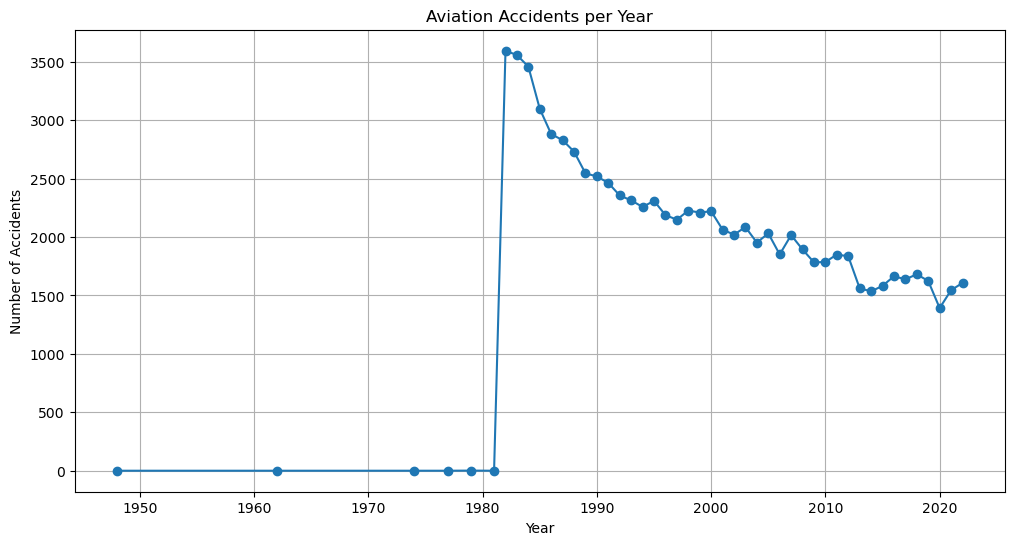

    YEAR  ACCIDENT_NUMBER
0   1948                1
1   1962                1
2   1974                1
3   1977                1
4   1979                2
5   1981                1
6   1982             3593
7   1983             3556
8   1984             3457
9   1985             3096
10  1986             2880
11  1987             2828
12  1988             2730
13  1989             2544
14  1990             2518
15  1991             2462
16  1992             2355
17  1993             2313
18  1994             2257
19  1995             2309
20  1996             2187
21  1997             2148
22  1998             2226
23  1999             2209
24  2000             2220
25  2001             2063
26  2002             2020
27  2003             2085
28  2004             1952
29  2005             2031
30  2006             1851
31  2007             2016
32  2008             1893
33  2009             1783
34  2010             1786
35  2011             1850
36  2012             1835
37  2013    

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(accidents_per_year['YEAR'], accidents_per_year['ACCIDENT_NUMBER'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Aviation Accidents per Year')
plt.grid(True)
plt.show()

print(accidents_per_year)

## In the chart above the accidents started increasing from the year 1980 and decreased by the year 2020.

# Number of Accidents per Aircraft Make

In [57]:
accidents_per_make =aviation_final.groupby('MAKE').size().reset_index(name='ACCIDENT_NUMBER')

In [ ]:
accidents_per_us_state =aviation_final.groupby('US_STATE').size().reset_index(name='ACCIDENT_NUMBER')

In [70]:
aviation_final.columns

Index(['EVENT_ID', 'INVESTIGATION_TYPE', 'ACCIDENT_NUMBER', 'EVENT_DATE',
       'COUNTRY', 'INJURY_SEVERITY', 'AIRCRAFT_DAMAGE', 'AIRCRAFT_CATEGORY',
       'REGISTRATION_NUMBER', 'MAKE', 'NUMBER_OF_ENGINES', 'ENGINE_TYPE',
       'PURPOSE_OF_FLIGHT', 'TOTAL_FATAL_INJURIES', 'TOTAL_SERIOUS_INJURIES',
       'TOTAL_MINOR_INJURIES', 'TOTAL_UNINJURED', 'WEATHER_CONDITION',
       'LOCATION_1', 'US_STATE', 'YEAR'],
      dtype='object')

In [ ]:
# Loading the Dataset
aviation= pd.read_excel ('AviationData.xlsx')


In [ ]:
# Loading the Dataset
aviation= pd.read_excel ('AviationData.xlsx')


In [71]:
# Calculate mean of 'Fatal' for each 'Purpose' category
mean_fatal_aviation_final =aviation_final .groupby('PURPOSE_OF_FLIGHT')['TOTAL_FATAL_INJURIES'].mean()

Text(0, 0.5, 'Total Number of accidents')

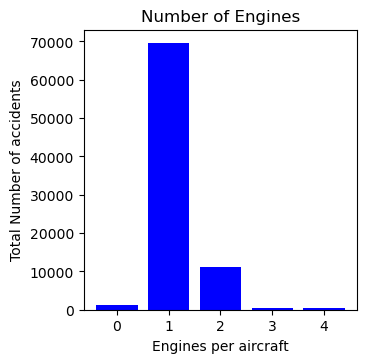

In [76]:
plt.figure(figsize=(12, 8))

# Engines
plt.subplot(2, 3, 1)
plt.bar(aviation_final['NUMBER_OF_ENGINES'].value_counts().index[0:5], aviation_final['NUMBER_OF_ENGINES'].value_counts().values[0:5], color='blue')
plt.title('Number of Engines')
plt.xlabel('Engines per aircraft')
plt.ylabel('Total Number of accidents')

### Aircrafts with 1 engine have shown to have a highest  number of accidents ###

Text(0, 0.5, 'Total Serious Injuries')

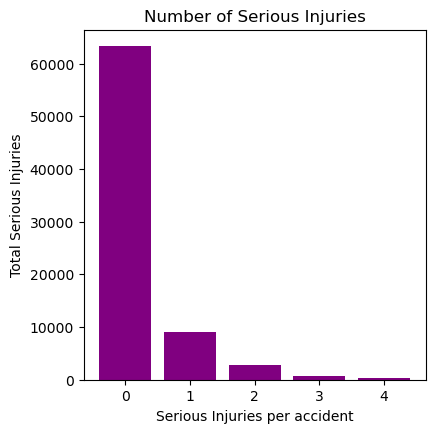

In [102]:
# Serious
plt.figure(figsize=(15,10))
plt.subplot(2, 3, 3)
plt.bar(aviation_final['TOTAL_SERIOUS_INJURIES'].value_counts().index[0:5], aviation_final['TOTAL_SERIOUS_INJURIES'].value_counts().values[0:5], color='PURPLE')
plt.title('Number of Serious Injuries')
plt.xlabel('Serious Injuries per accident')
plt.ylabel('Total Serious Injuries')

Text(0, 0.5, 'Make')

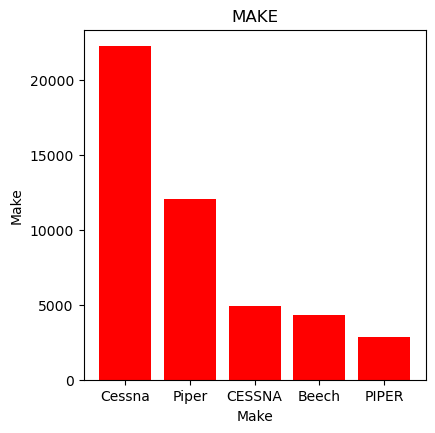

In [125]:
# Make
plt.figure(figsize=(15,10))
plt.subplot(2, 3,6)
plt.bar(aviation_final['MAKE'].value_counts().index[0:5], aviation_final['MAKE'].value_counts().values[0:5], color='RED')
plt.title('MAKE')
plt.xlabel('Make')
plt.ylabel('Make')

### The CESSNA Aircraft seems to have the highest number of accidents ###

Text(0, 0.5, 'TOTAL_FATAL_INJURIES')

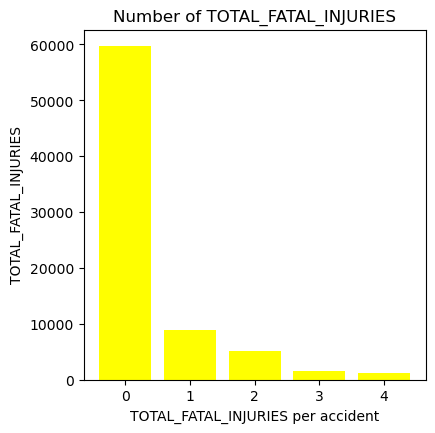

In [100]:
# Fatalities
plt.figure(figsize=(15,10))
plt.subplot(2, 3, 2)
plt.bar(aviation_final['TOTAL_FATAL_INJURIES'].value_counts().index[0:5], aviation_final['TOTAL_FATAL_INJURIES'].value_counts().values[0:5], color='YELLOW')
plt.title('Number of TOTAL_FATAL_INJURIES')
plt.xlabel('TOTAL_FATAL_INJURIES per accident')
plt.ylabel('TOTAL_FATAL_INJURIES')

Text(0, 0.5, 'TOTAL_UNINJURED')

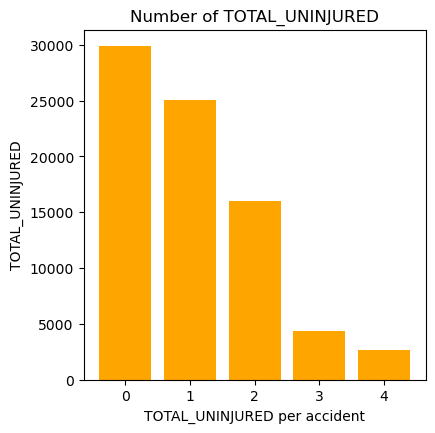

In [93]:
# Uninjured
plt.figure(figsize=(15,10))
plt.subplot(2, 3, 5)
plt.bar(aviation_final['TOTAL_UNINJURED'].value_counts().index[0:5], aviation_final['TOTAL_UNINJURED'].value_counts().values[0:5], color='orange')
plt.title('Number of TOTAL_UNINJURED')
plt.xlabel('TOTAL_UNINJURED per accident')
plt.ylabel('TOTAL_UNINJURED')

Text(0, 0.5, 'US_STATE')

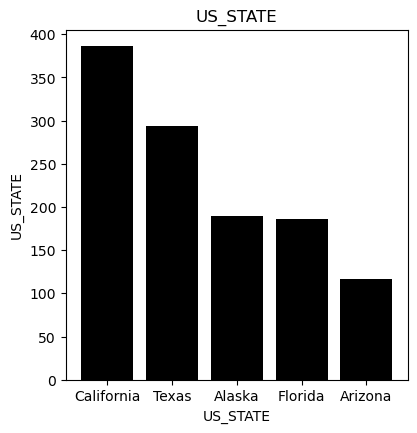

In [97]:
# Us_State
plt.figure(figsize=(15,10))
plt.subplot(2, 3,6)
plt.bar(aviation_final['US_STATE'].value_counts().index[0:5], aviation_final['US_STATE'].value_counts().values[0:5], color='black')
plt.title('US_STATE')
plt.xlabel('US_STATE')
plt.ylabel('US_STATE')

### In the  state of Califonia  recorded the highest number of accidents ###

Text(0, 0.5, 'WEATHER_CONDITION')

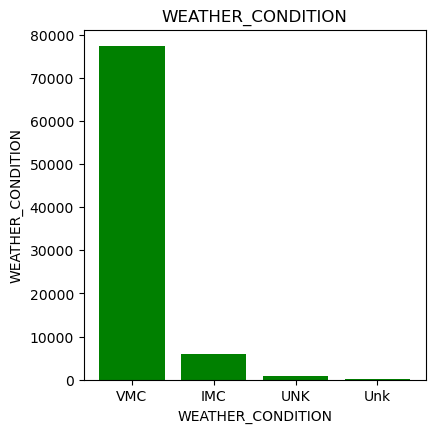

In [99]:
# Weather
plt.figure(figsize=(15,10))
plt.subplot(2, 3,6)
plt.bar(aviation_final['WEATHER_CONDITION'].value_counts().index[0:5], aviation_final['WEATHER_CONDITION'].value_counts().values[0:5], color='GREEN')
plt.title('WEATHER_CONDITION')
plt.xlabel('WEATHER_CONDITION')
plt.ylabel('WEATHER_CONDITION')

# Visual meteorological conditions (VMC) #

VMC refers to weather conditions in which pilots have sufficient visibility and reference to the ground or horizon to navigate and control the aircraft visually.

## Instrument meteorological conditions (IMC) ##

IMC refers to weather conditions that do not meet the criteria for Visual Meteorological Conditions. This means that the visibility and/or cloud clearance are below the minimum required for VMC.
In IMC, pilots cannot adequately navigate or control the aircraft using visual references due to poor visibility or obscured horizon.

### As the analysis shows that the weather conditions under VMC results to the highest number of accidents ###

Text(0, 0.5, 'PURPOSE_OF_FLIGHT ')

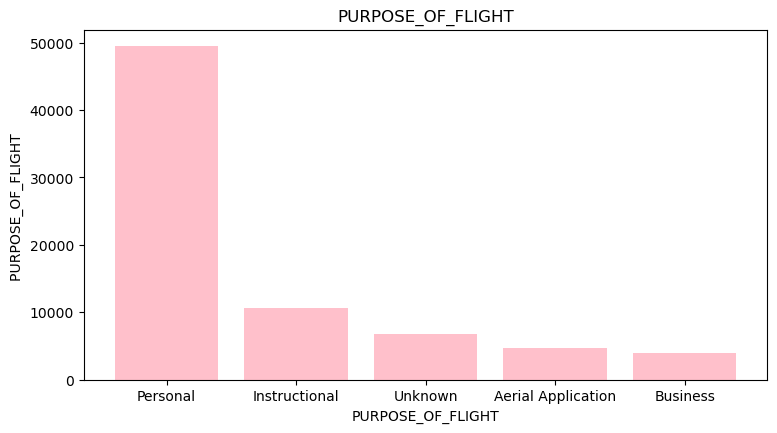

In [ ]:
#PURPOSE_OF_FLIGHT
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 1)
plt.bar(aviation_final['PURPOSE_OF_FLIGHT'].value_counts().index[0:5], aviation_final['PURPOSE_OF_FLIGHT'].value_counts().values[0:5], color='PINK')
plt.title('PURPOSE_OF_FLIGHT')
plt.xlabel('PURPOSE_OF_FLIGHT')
plt.ylabel('PURPOSE_OF_FLIGHT ')

### The personal flights  recorded the highest number of accidents ###

Text(0, 0.5, 'ENGINE_TYPE ')

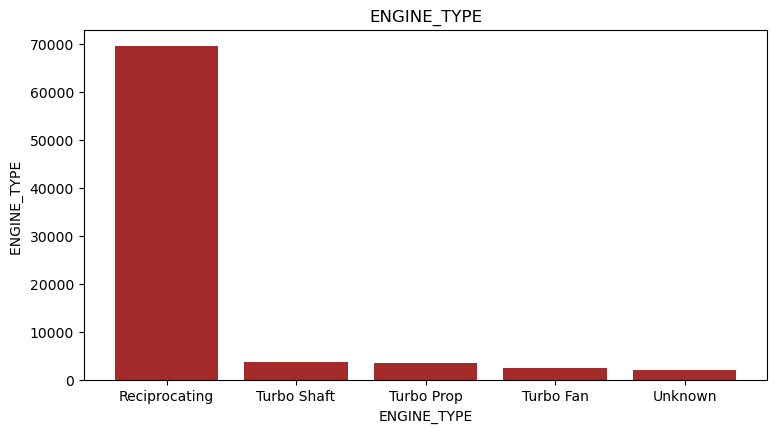

In [114]:
#ENGINE_TYPE
plt.figure(figsize=(30, 10))
plt.subplot(2, 3, 1)
plt.bar(aviation_final['ENGINE_TYPE'].value_counts().index[0:5], aviation_final['ENGINE_TYPE'].value_counts().values[0:5], color='BROWN')
plt.title('ENGINE_TYPE')
plt.xlabel('ENGINE_TYPE')
plt.ylabel('ENGINE_TYPE ')

### The Reciprocating Engines  recorded the highest number of accidents therefore investors should not pick this type of engines. ###

Text(0, 0.5, 'AIRCRAFT_DAMAGE ')

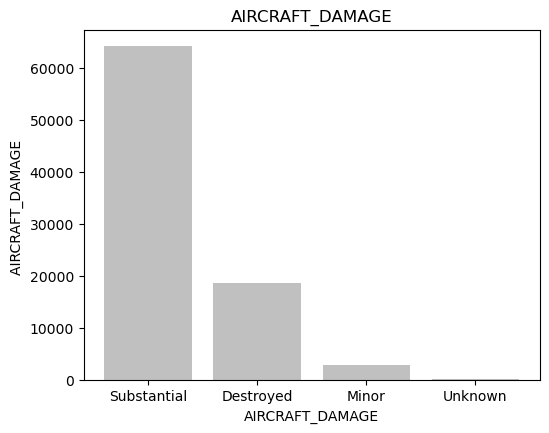

In [123]:
#AIRCRAFT_DAMAGE
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
plt.bar(aviation_final['AIRCRAFT_DAMAGE'].value_counts().index[0:5], aviation_final['AIRCRAFT_DAMAGE'].value_counts().values[0:5], color='SILVER')
plt.title('AIRCRAFT_DAMAGE')
plt.xlabel('AIRCRAFT_DAMAGE')
plt.ylabel('AIRCRAFT_DAMAGE ')

### Throuhout history the data shows that when aviation accidents occure, aircraft damage caused was substantial. ###

## Conclusion

The Company should avoid the CESSNA aircraft model with 1No engine as  well reciporcating engines as they were observed to have the highest number of accidents.